# **PROJECT** #
## ***STOCK PRICE TIMELINE FORECASTING*** ##

### **Company Name: INFOSYS** ###
### **MODEL: ARIMA** ###

In [1]:

# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import pickle

### **Importing data from file infosys.csv** ###

**We have extracted the stock prices for INFOSYS from the website https://finance.yahoo.com/**
Steps are as follows -

    1. Visited the website https://finance.yahoo.com/
    2. Select the INFOSYS Stocks by searching in the search bar for "INFOSYS" and the BSE index.
    3. The data shows up as "Infosys Limited (INFY.BO)".
        In order to get the historical data for stock prices for INFOSYS, we need to select the "Historical Data" tab.
    4. We need to now select the "Time Period", with the Frequency as "Daily". We can click on the start "Time Period" and click "Max". It gives the maximum Time Period for stock prices.
    5. Click on the Apply button. This will give the Daily stock prices for the given maximum duration, in this case "Jan 03, 2000 - Nov 28, 2023".
    6. Click on the Download button. This will give us the option to download the file in a location in the computer.
        We have selected to download as a .csv file with the name as "infosys.csv"

In [2]:
# Importing the data from the file 'infosys.csv'
stock_orig_data = pd.read_csv('infosys.csv')
stock_orig_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,117.273438,122.480469,117.273438,122.480469,-2.162692,3804416.0
1,04-01-2000,132.278519,132.278519,125.000000,132.110931,-2.332741,12100608.0
2,05-01-2000,131.257813,131.257813,121.542191,121.542191,-2.146124,15264256.0
3,06-01-2000,119.531250,120.312500,111.819138,111.819138,-1.974440,9052800.0
4,07-01-2000,102.875000,102.875000,102.873825,102.873825,-1.816489,696832.0
...,...,...,...,...,...,...,...
5967,10-11-2023,1371.000000,1373.199951,1361.199951,1368.699951,1368.699951,477065.0
5968,13-11-2023,1378.599976,1382.849976,1370.699951,1374.150024,1374.150024,134432.0
5969,15-11-2023,1386.050049,1413.099976,1386.050049,1411.150024,1411.150024,306197.0
5970,16-11-2023,1411.349976,1453.349976,1410.300049,1443.900024,1443.900024,629062.0


Importing the file "infosys.csv" and reading it via the pandas read_csv module.</br>
**This gives us the columns - Date, Open, High, Low, Close, Adj Close and Volume.**</br>
We are interested in the "Date" and "Close" columns, so we will remove the remaining columns as part of the EDA steps.

### **EDA (Exploratory Data Analysis)** ###

In [3]:
# Getting the shape of the Data Frame, it shows us that we have 5972 rows and 7 columns
stock_orig_data.shape

(5972, 7)

#### *Descriptive Analysis* ####

In [4]:
# The .describe function help us get the Descriptive Analysis of the DataFrame.
# It give us the Count, Mean, Standard Deviation, Minimum, 25% Quartile, 50% Quartile or Median, 75% Quartile and the Maximum Value for each of the columns.
stock_orig_data.describe() # Describes the entire dataset

,Open,High,Low,Close,Adj Close,Volume
count,5922.000000,5922.000000,5922.000000,5922.000000,5922.000000,5.922000e+03
mean,473.109831,478.137824,467.821550,472.899457,383.979522,5.398202e+06
std,444.270908,448.293479,440.152100,444.180493,472.866010,1.053604e+07
min,34.340626,34.340626,34.340626,34.340626,-7.086354,0.000000e+00
25%,151.865627,154.132816,148.505856,151.617973,36.791442,3.543765e+05
50%,342.668747,345.906250,339.568756,342.759384,185.091980,8.867240e+05
75%,575.637512,583.756241,569.712494,576.850006,526.586715,4.093948e+06
max,1935.000000,1953.699951,1931.150024,1939.349976,1889.180664,1.409381e+08


In [5]:
# If we want to get the Descriptive Analysis data for only the specific column/feature "Close", 
# we can run the command specific to that column as shown below
stock_orig_data['Close'].describe() # describe for the required column/feature 'Close'

count    5922.000000
mean      472.899457
std       444.180493
min        34.340626
25%       151.617973
50%       342.759384
75%       576.850006
max      1939.349976
Name: Close, dtype: float64

In [6]:
# We get the details of the number of null/non-null values and Data time for each column/feature.
stock_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5972 non-null   object 
 1   Open       5922 non-null   float64
 2   High       5922 non-null   float64
 3   Low        5922 non-null   float64
 4   Close      5922 non-null   float64
 5   Adj Close  5922 non-null   float64
 6   Volume     5922 non-null   float64
dtypes: float64(6), object(1)
memory usage: 326.7+ KB


*Creating backup file*

In [7]:
# Creating a file 'stock_data' as copy of the original file 'stock_orig_data'
# We will do all the changes in this file only.

stock_data = stock_orig_data.copy()

#### *Dropping columns not needed* ####

In [8]:
# Once we have created a backup for the original file, we can now do changes on the file copy "stock_data"
# We are retraining only the desired 
stock_data = stock_orig_data[['Date','Close']]

In [9]:
stock_data

,Date,Close
0,03-01-2000,122.480469
1,04-01-2000,132.110931
2,05-01-2000,121.542191
3,06-01-2000,111.819138
4,07-01-2000,102.873825
...,...,...
5967,10-11-2023,1368.699951
5968,13-11-2023,1374.150024
5969,15-11-2023,1411.150024
5970,16-11-2023,1443.900024


#### *Checking for Null Values* ####

In [10]:
stock_data.shape

(5972, 2)

In [11]:
# Checking to see if there are any null values
# We can get this information using stock_data.info() option as well
stock_data.isnull().sum() # The result shows that there are null values

Date      0
Close    50
dtype: int64

In [12]:
stock_data.dropna(subset=['Close'], inplace=True) # We are concentrating on dropping for 'Close' column our intended column. 
# However, dropping null values in 'Close' column will have a desired effect on other columns as well.

In [13]:
stock_data.shape

(5922, 2)

In [14]:
stock_data.isnull().sum() # Rechecking after dropping null values

Date     0
Close    0
dtype: int64

#### *Checking for missing values* ####

In [15]:
# Check for missing values
stock_data.isna().sum() # The result shows that there are no missing values

Date     0
Close    0
dtype: int64

#### *Checking for Duplicates* ####

In [16]:
# Checking for Duplicate Values
stock_data.duplicated()  # if any 2 rows has same values

0       False
1       False
2       False
3       False
4       False
        ...  
5967    False
5968    False
5969    False
5970    False
5971    False
Length: 5922, dtype: bool

In [17]:
# Count of duplicated rows
stock_data[stock_data.duplicated()].shape # We see that there are no duplicates

(0, 2)

In [18]:
# Print the duplicated rows. Since we have no duplicates it will show us nothing
stock_data[stock_data.duplicated()] # There are no duplicates

,Date,Close


#### *Checking the data structure* ####

In [19]:
# Data Structure
print(type(stock_data))

<class 'pandas.core.frame.DataFrame'>


In [20]:
# Checking data types
stock_data.dtypes # check data types of all variables

Date      object
Close    float64
dtype: object

#### *Renaming columns* ####

In [21]:
# Renaming column names
stock_data.rename(columns = {'Date':'DATE','Close':'STOCK_PRICE'}, inplace = True)
stock_data.head()

,DATE,STOCK_PRICE
0,03-01-2000,122.480469
1,04-01-2000,132.110931
2,05-01-2000,121.542191
3,06-01-2000,111.819138
4,07-01-2000,102.873825


In [22]:
stock_data

,DATE,STOCK_PRICE
0,03-01-2000,122.480469
1,04-01-2000,132.110931
2,05-01-2000,121.542191
3,06-01-2000,111.819138
4,07-01-2000,102.873825
...,...,...
5967,10-11-2023,1368.699951
5968,13-11-2023,1374.150024
5969,15-11-2023,1411.150024
5970,16-11-2023,1443.900024


#### *Outlier Detection* ####

Text(0.5, 0.98, 'Close')

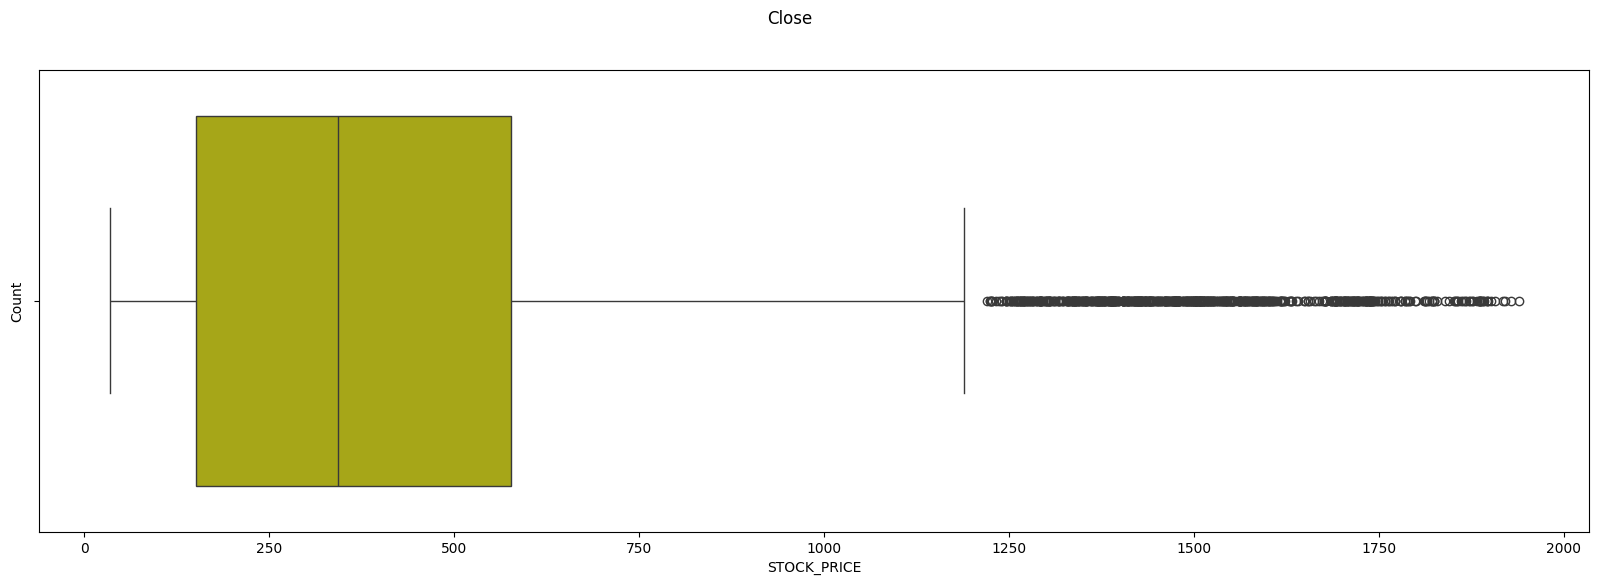

In [23]:
plt.figure(figsize=(20,6))
sns.boxplot(data=stock_data, x='STOCK_PRICE', color='#bebe00')
plt.ylabel('Count')
plt.suptitle('Close')

##### **INFERENCE** #####
1. Since the Mean is greater than the Median the data is "Positively Skewed"
2. IQR=576-151=425
3. The Median is 342
4. There are many outliers between 1250 and 2000

#### *Converting 'DATE' column to Index* ####

In [24]:
stock_data.set_index('DATE',inplace=True)

In [25]:
stock_data

,STOCK_PRICE
DATE,
03-01-2000,122.480469
04-01-2000,132.110931
05-01-2000,121.542191
06-01-2000,111.819138
07-01-2000,102.873825
...,...
10-11-2023,1368.699951
13-11-2023,1374.150024
15-11-2023,1411.150024


In [26]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5922 entries, 03-01-2000 to 17-11-2023
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STOCK_PRICE  5922 non-null   float64
dtypes: float64(1)
memory usage: 92.5+ KB


In [27]:
stock_data

,STOCK_PRICE
DATE,
03-01-2000,122.480469
04-01-2000,132.110931
05-01-2000,121.542191
06-01-2000,111.819138
07-01-2000,102.873825
...,...
10-11-2023,1368.699951
13-11-2023,1374.150024
15-11-2023,1411.150024


In [28]:
stock_data['DATE'] = stock_data.index
stock_data

,STOCK_PRICE,DATE
DATE,,
03-01-2000,122.480469,03-01-2000
04-01-2000,132.110931,04-01-2000
05-01-2000,121.542191,05-01-2000
06-01-2000,111.819138,06-01-2000
07-01-2000,102.873825,07-01-2000
...,...,...
10-11-2023,1368.699951,10-11-2023
13-11-2023,1374.150024,13-11-2023
15-11-2023,1411.150024,15-11-2023


##### **INFERENCE** #####
- As we can see here DATE is showing as 'object' i.e. a string type.
- We need to convert this to datetime format

#### *Converting 'DATE' column datetime format* ####

In [29]:
stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],format='%d-%m-%Y')

In [30]:
stock_data["DATE"].info()

<class 'pandas.core.series.Series'>
Index: 5922 entries, 03-01-2000 to 17-11-2023
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
5922 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 92.5+ KB


#### **VISUALIZATIONS** ####

In [31]:
stock_data["MONTH"] = stock_data.DATE.dt.strftime("%b") # month extraction
stock_data["YEAR"] = stock_data.DATE.dt.strftime("%Y") # year extraction
stock_data["YEAR-MONTH"] = stock_data.DATE.dt.strftime("%Y-%m")
stock_data_bak = stock_data.copy()
stock_data

,STOCK_PRICE,DATE,MONTH,YEAR,YEAR-MONTH
DATE,,,,,
03-01-2000,122.480469,2000-01-03,Jan,2000,2000-01
04-01-2000,132.110931,2000-01-04,Jan,2000,2000-01
05-01-2000,121.542191,2000-01-05,Jan,2000,2000-01
06-01-2000,111.819138,2000-01-06,Jan,2000,2000-01
07-01-2000,102.873825,2000-01-07,Jan,2000,2000-01
...,...,...,...,...,...
10-11-2023,1368.699951,2023-11-10,Nov,2023,2023-11
13-11-2023,1374.150024,2023-11-13,Nov,2023,2023-11
15-11-2023,1411.150024,2023-11-15,Nov,2023,2023-11


In [32]:
def replace_outlier(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile range
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    median_val = df_in[col_name].median()
    df_out = df_in.copy()
    for i, j in df_in.iterrows():
        if (j[col_name] > upper):
            df_out.at[i, col_name] = upper
        elif (j[col_name] < lower):
            df_out.at[i, col_name] = lower
        else:
            df_out.at[i, col_name] = df_out.at[i, col_name]
    return df_out

In [33]:
def check_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile range
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    outliers = False
    for i, j in df_in.iterrows():
        if (j[col_name] > upper):
            outliers = True
        elif (j[col_name] < lower):
            outliers = True
    return outliers

In [34]:
# Removing the outliers and saving them in the dataframe stock_data_bak
ym_periods = stock_data['YEAR-MONTH'].unique()
ym_periods
for ym in ym_periods:
    temp_s_data = stock_data.groupby(['YEAR-MONTH']).get_group(ym)
    col_name = 'STOCK_PRICE'
    for i in range(1, 50):
        if (check_outliers(temp_s_data, col_name) == True):
            stock_data_out = replace_outlier(temp_s_data, col_name)
            stock_data_bak = stock_data_bak.set_index('DATE')
            stock_data_out = stock_data_out.set_index('DATE')
            stock_data_bak.update(stock_data_out)
            stock_data_bak.reset_index(inplace=True)

In [35]:
stock_data_bak.set_index('DATE',inplace=True)
stock_data_bak['DATE'] = pd.to_datetime(stock_data_bak.index,format='%Y-%m-%d')
stock_data_bak

,STOCK_PRICE,MONTH,YEAR,YEAR-MONTH,DATE
DATE,,,,,
2000-01-03,122.480469,Jan,2000,2000-01,2000-01-03
2000-01-04,132.110931,Jan,2000,2000-01,2000-01-04
2000-01-05,121.542191,Jan,2000,2000-01,2000-01-05
2000-01-06,111.819138,Jan,2000,2000-01,2000-01-06
2000-01-07,102.873825,Jan,2000,2000-01,2000-01-07
...,...,...,...,...,...
2023-11-10,1368.699951,Nov,2023,2023-11,2023-11-10
2023-11-13,1374.150024,Nov,2023,2023-11,2023-11-13
2023-11-15,1411.150024,Nov,2023,2023-11,2023-11-15


##### **INFERENCE** #####
**We have been able to impute the outliers using the function to substitute the outliers with the upper/lower limit values**
1. The before year graph shows the monthly outliers before imputation.
2. The after year graph shows the monthly outliers after imputation.
3. Now we see that all outliers have been fixed and don't see any outliers.

In [36]:
# Substituting the dataframe stock_data with the dataframe stock_data_bak, which does not have any outliers
stock_data = stock_data_bak.copy()

In [37]:
stock_data_input = stock_data[['STOCK_PRICE']]

In [38]:
stdata = np.array(stock_data['STOCK_PRICE'])
stdata

array([ 122.480469,  132.110931,  121.542191, ..., 1411.150024,
       1443.900024, 1437.650024])

In [39]:
split_percent = 0.80
train_data, test_data = stock_data_input[:int(len(stock_data_input)*split_percent)], stock_data_input[int(len(stock_data_input)*split_percent):]


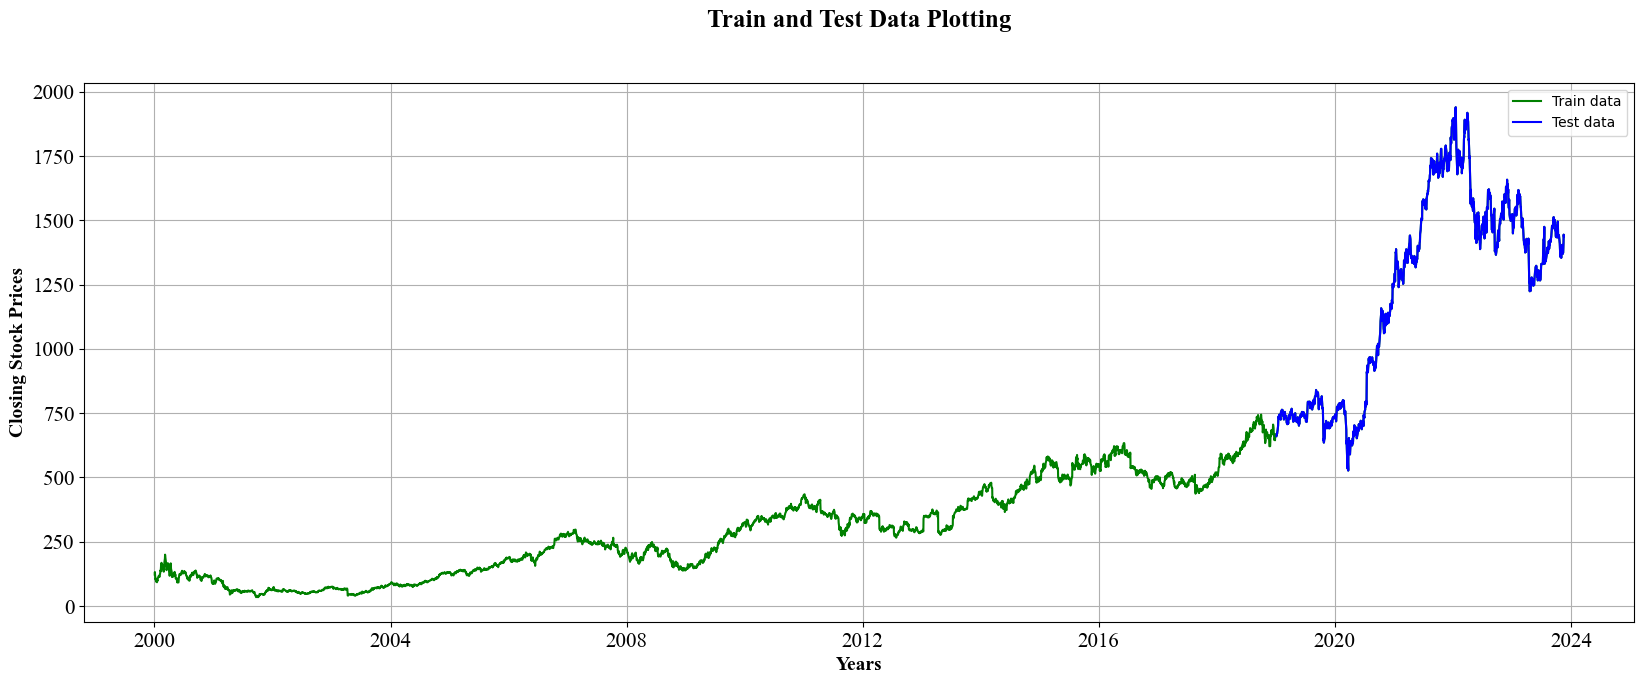

In [40]:
plt.figure(figsize=(20,7))
plt.grid(True)
plt.xlabel('Years', weight='bold', fontfamily = "Times New Roman", size = '14')
plt.ylabel('Closing Stock Prices', weight='bold', fontfamily = "Times New Roman", size = '14')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.plot(stock_data_input, color='green', label='Train data')
plt.plot(test_data, color='blue', label='Test data')
plt.title("Train and Test Data Plotting\n\n", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.legend()
plt.show()

In [41]:
st_data = stock_data[['STOCK_PRICE']]
st_data.reset_index()

,DATE,STOCK_PRICE
0,2000-01-03,122.480469
1,2000-01-04,132.110931
2,2000-01-05,121.542191
3,2000-01-06,111.819138
4,2000-01-07,102.873825
...,...,...
5917,2023-11-10,1368.699951
5918,2023-11-13,1374.150024
5919,2023-11-15,1411.150024
5920,2023-11-16,1443.900024


In [42]:
stocks= pd.DataFrame()
stocks['STOCK_PRICE'] = stock_data[['STOCK_PRICE']]

,STOCK_PRICE
DATE,
2000-01-03,4.807952
2000-01-04,4.883642
2000-01-05,4.800261
2000-01-06,4.716883
2000-01-07,4.633503


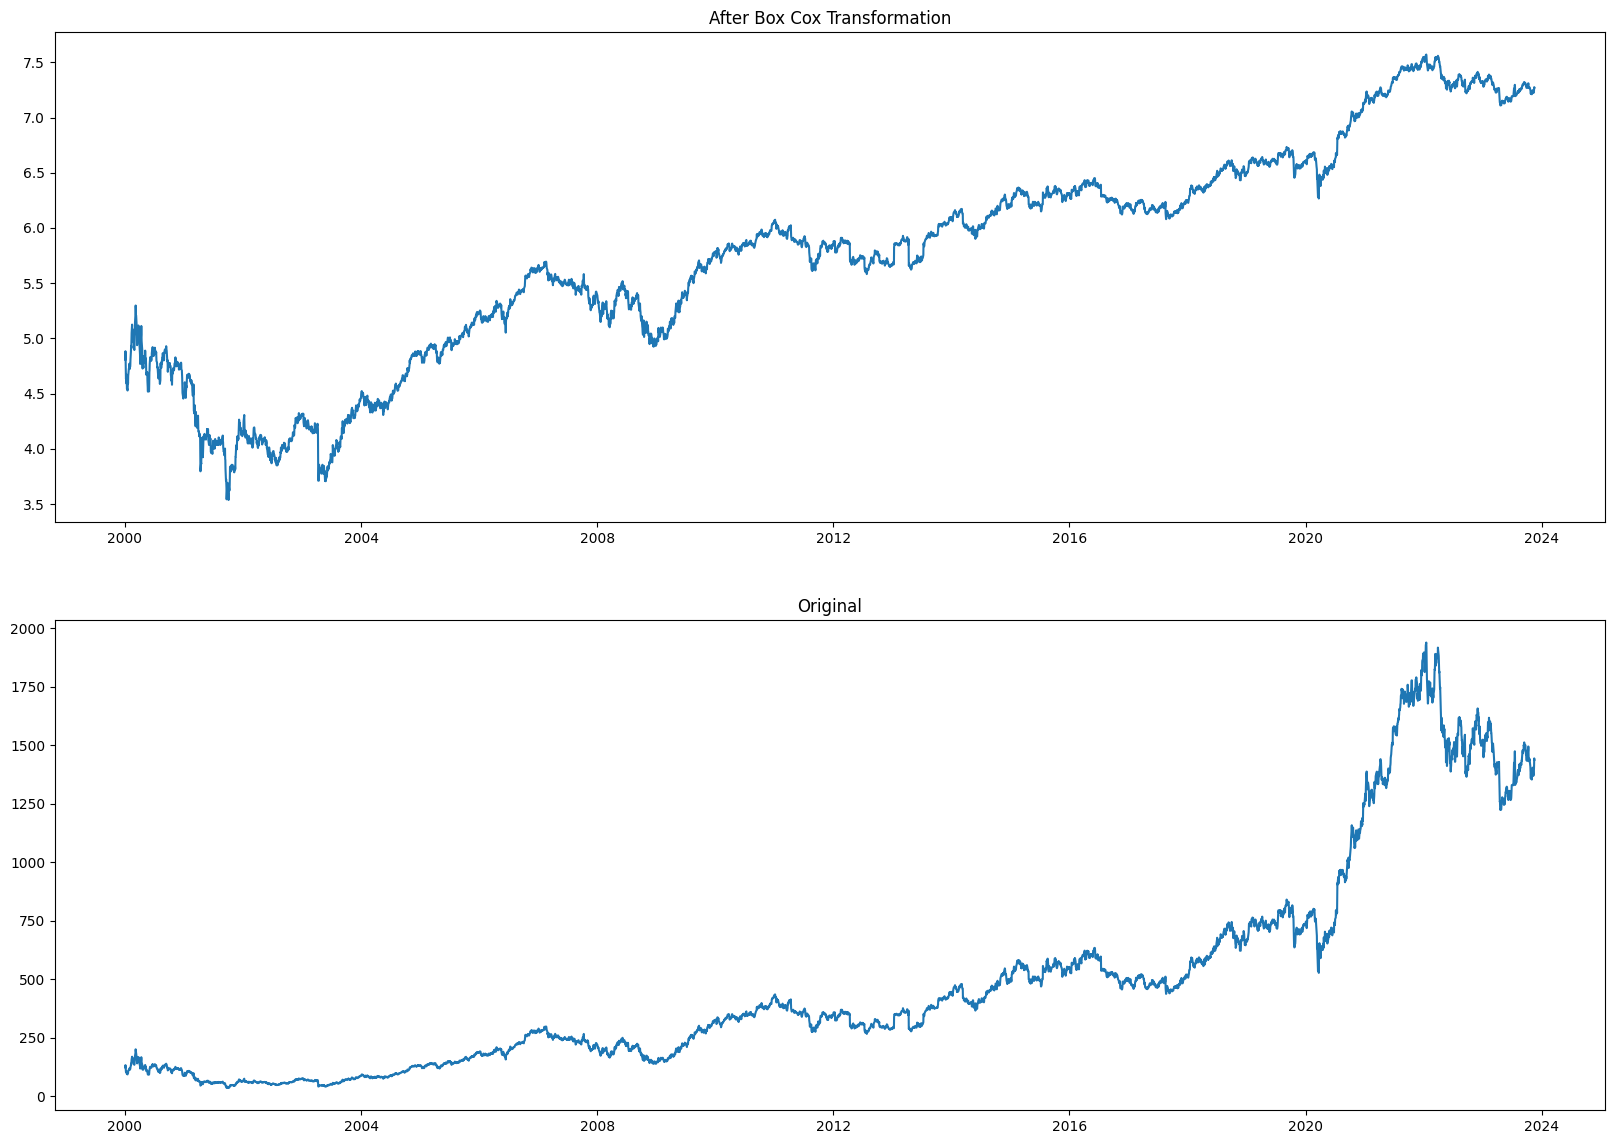

In [43]:
data_boxcox = pd.DataFrame()
data_boxcox['STOCK_PRICE'] = boxcox(stocks['STOCK_PRICE'], 0)
data_boxcox.index = stocks.index
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(20,14),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(stocks, label='original')
axis[1].set_title('Original')
plt.show()

In [44]:
from scipy.special import boxcox, inv_boxcox
df = pd.DataFrame()
df['inverse'] = inv_boxcox(data_boxcox['STOCK_PRICE'], 0)
print(df, stocks['STOCK_PRICE'])

                inverse
DATE                   
2000-01-03   122.480469
2000-01-04   132.110931
2000-01-05   121.542191
2000-01-06   111.819138
2000-01-07   102.873825
...                 ...
2023-11-10  1368.699951
2023-11-13  1374.150024
2023-11-15  1411.150024
2023-11-16  1443.900024
2023-11-17  1437.650024

[5922 rows x 1 columns] DATE
2000-01-03     122.480469
2000-01-04     132.110931
2000-01-05     121.542191
2000-01-06     111.819138
2000-01-07     102.873825
                 ...     
2023-11-10    1368.699951
2023-11-13    1374.150024
2023-11-15    1411.150024
2023-11-16    1443.900024
2023-11-17    1437.650024
Name: STOCK_PRICE, Length: 5922, dtype: float64


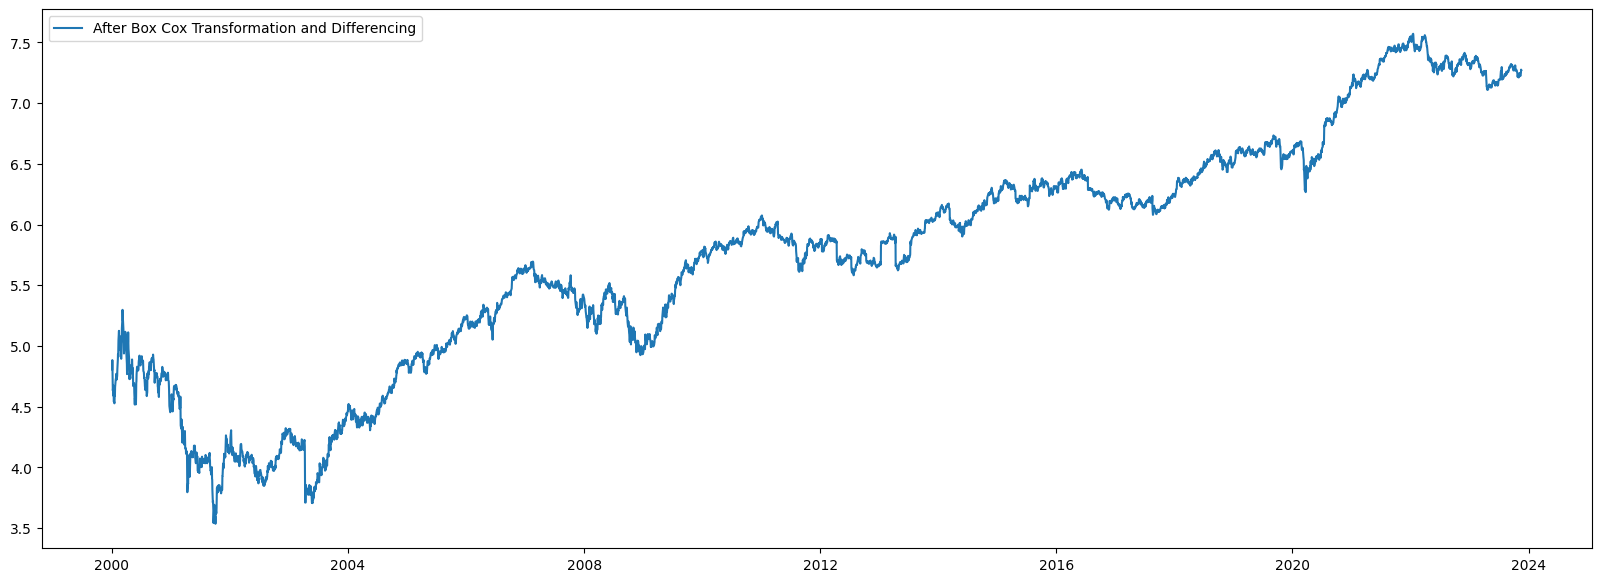

In [45]:
# Differencing of the Box-Cox Transformation
data_boxcox_diff = data_boxcox - data_boxcox.shift() # Performs difference between the previous and current observations.
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(20,7))
plt.plot(data_boxcox, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

In [46]:
split_percent = 0.80
train_data_boxcox, test_data_boxcox = data_boxcox[:int(len(data_boxcox)*split_percent)], data_boxcox[int(len(data_boxcox)*split_percent):]
train_data_boxcox_diff, test_data_boxcox_diff = data_boxcox_diff[:int(len(data_boxcox_diff)*split_percent)], data_boxcox_diff[int(len(data_boxcox_diff)*split_percent):]

In [47]:
sdata_bc = data_boxcox.copy()
sdata_bc.reset_index(drop=True, inplace=True)
sdata_bc['STOCK_PRICE']

0       4.807952
1       4.883642
2       4.800261
3       4.716883
4       4.633503
          ...   
5917    7.221617
5918    7.225591
5919    7.252160
5920    7.275103
5921    7.270765
Name: STOCK_PRICE, Length: 5922, dtype: float64

In [48]:
visualization_arima_bc = pd.DataFrame()
visualization_arima_bc['STOCK_PRICE'] = stock_data_input['STOCK_PRICE']
visualization_arima_bc['DIFF'] = data_boxcox['STOCK_PRICE']
visualization_arima_bc['INVERSE'] = inv_boxcox(data_boxcox['STOCK_PRICE'], 0)
visualization_arima_bc.reset_index(drop=True, inplace=True)
visualization_arima_bc
# visualization_arima_bc

,STOCK_PRICE,DIFF,INVERSE
0,122.480469,4.807952,122.480469
1,132.110931,4.883642,132.110931
2,121.542191,4.800261,121.542191
3,111.819138,4.716883,111.819138
4,102.873825,4.633503,102.873825
...,...,...,...
5917,1368.699951,7.221617,1368.699951
5918,1374.150024,7.225591,1374.150024
5919,1411.150024,7.252160,1411.150024
5920,1443.900024,7.275103,1443.900024


                               SARIMAX Results                                
Dep. Variable:            STOCK_PRICE   No. Observations:                 5922
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -22364.561
Date:                Tue, 19 Dec 2023   AIC                          44739.123
Time:                        01:14:39   BIC                          44772.555
Sample:                             0   HQIC                         44750.740
                               - 5922                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        472.8797   1086.507      0.435      0.663   -1656.634    2602.393
ar.L1          0.9998      0.000   3964.175      0.000       0.999       1.000
ma.L1          0.0379      0.006      6.220      0.0

Text(0.5, 1.0, 'ARIMAX VISUALIZATION\n\n')

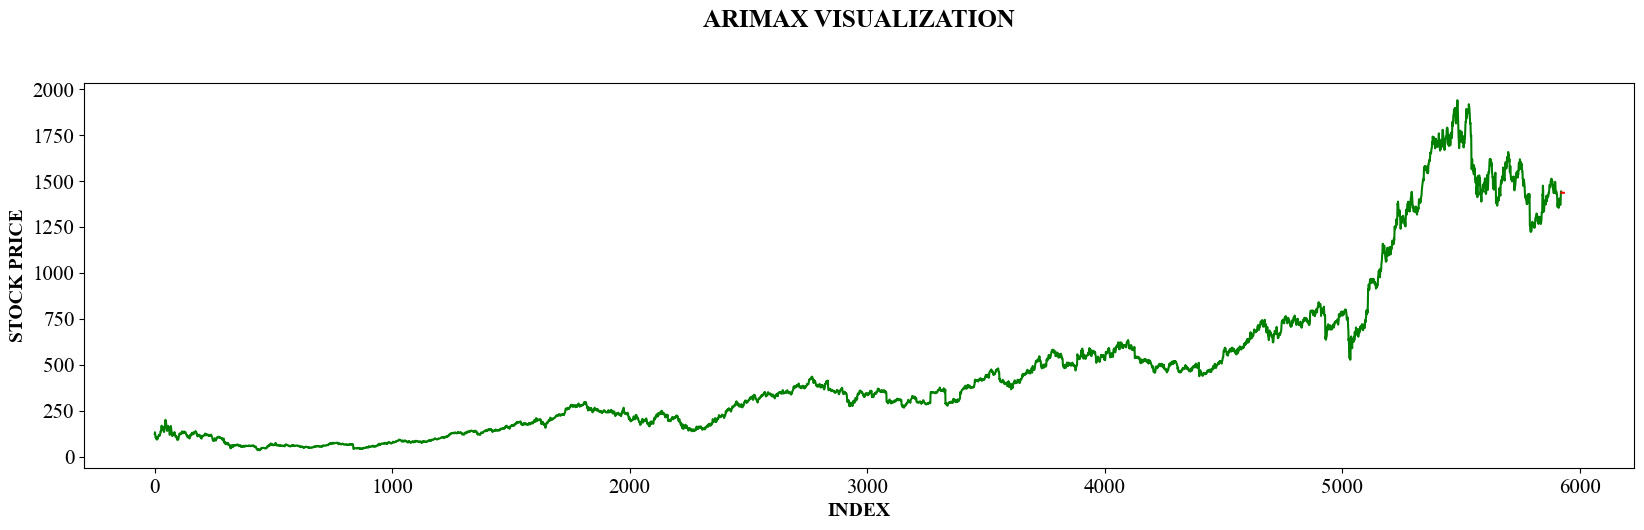

In [49]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 1, 0, 2
duration = 10

arima_pre_model = ARIMA(visualization_arima_bc['STOCK_PRICE'], order=(p, d, q))
arima_pre_model = arima_pre_model.fit()
print(arima_pre_model.summary())

# Predict the next 356 days below in order to see the trend. In a normal scenario, we can just take it for 15-30 days.
#forecast = arima_pre_model.predict(n_periods=30) # Alternate command for the below.
forecast = arima_pre_model.predict(len(visualization_arima_bc['STOCK_PRICE']), len(visualization_arima_bc['STOCK_PRICE'])+duration)
print(forecast)



# plot forecast
plt.figure(figsize=(20,5))
plt.plot(visualization_arima_bc['STOCK_PRICE'], 'green', label='Actual')
plt.plot(forecast, 'red', label='Forecast')
plt.xlabel('INDEX', weight='bold', fontfamily = "Times New Roman", size = '14')
plt.ylabel('STOCK PRICE', weight='bold', fontfamily = "Times New Roman", size = '14')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.title("ARIMAX VISUALIZATION\n\n", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')


In [50]:
len(visualization_arima_bc['STOCK_PRICE'])
len(visualization_arima_bc['STOCK_PRICE'])+duration
visualization_arima_bc.STOCK_PRICE[1]


132.110931

In [51]:
def get_metrics(dataset, pred):
    rmse_val = np.round(np.sqrt(mean_squared_error(dataset, pred)),2)
    mape_val = np.round(mean_absolute_percentage_error(dataset, pred)*100,2)
    return rmse_val, mape_val

In [52]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA

split_percent = 0.80
arima_train_data, arima_test_data = data_boxcox[:int(len(data_boxcox)*split_percent)], data_boxcox[int(len(data_boxcox)*split_percent):]
p, d, q = 2, 1, 0

arima_model = ARIMA(arima_train_data['STOCK_PRICE'], order=(p, d, q))
arima_model = arima_model.fit()
arima_pred = arima_model.predict(int(len(data_boxcox)*split_percent), int(len(data_boxcox)*split_percent)+len(arima_test_data)-1)
arima_rmse, arima_mape = get_metrics(arima_test_data['STOCK_PRICE'], arima_pred)
print(f'ARIMA Model Evaluation - \nRoot Mean Squared Error (RMSE): {arima_rmse}\nMean Absolute Percent Error (MAPE): {arima_mape}\n')

ARIMA Model Evaluation - 
Root Mean Squared Error (RMSE): 0.65
Mean Absolute Percent Error (MAPE): 7.67



In [53]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [54]:
p, d, q = 2, 1, 0
order=(p, d, q)
rmse = evaluate_arima_model(data_boxcox['STOCK_PRICE'], arima_order=order)

In [67]:
rmse

0.00033730041253846944

In [55]:
arima_model.save('C://Users/Office/mypy_3.10/Project/arima_model.h5')

In [56]:
from keras.models import load_model
# arima_model = load_model("C://Users/Office/mypy_3.10/Project/arima_model.h5")

In [57]:
forecast

5922    1436.647762
5923    1436.621506
5924    1436.469940
5925    1436.318398
5926    1436.166879
5927    1436.015385
5928    1435.863914
5929    1435.712467
5930    1435.561044
5931    1435.409644
5932    1435.258269
Name: predicted_mean, dtype: float64

In [58]:
forecast_list = forecast.tolist()
forecast_list

[1436.6477621395172,
 1436.6215061985463,
 1436.4699400714908,
 1436.3183977809958,
 1436.1668793233127,
 1436.0153846946932,
 1435.8639138913898,
 1435.7124669096554,
 1435.5610437457437,
 1435.409644395909,
 1435.258268856406]

In [59]:
import datetime
final_arima_stock_data = stock_data_input.copy()
final_arima_stock_data.reset_index(drop=True, inplace=True)
final_arima_stock_data['DATE'] = stock_data_input.index
final_arima_stock_data

,STOCK_PRICE,DATE
0,122.480469,2000-01-03
1,132.110931,2000-01-04
2,121.542191,2000-01-05
3,111.819138,2000-01-06
4,102.873825,2000-01-07
...,...,...
5917,1368.699951,2023-11-10
5918,1374.150024,2023-11-13
5919,1411.150024,2023-11-15
5920,1443.900024,2023-11-16


In [60]:
import datetime
new_forecast = pd.DataFrame(columns=final_arima_stock_data.columns)
new_forecast['STOCK_PRICE'] = forecast_list
new_forecast['Indicator'] = 'forecasted'

# Getting the last row date from 'DATE' column, which can be used to get the start_date and end_date
last_row_date = final_arima_stock_data.DATE.iloc[-1] 
last_row_date = pd.to_datetime(last_row_date, format = '%Y-%m-%d') # Last date of the data frame in formatted
start_date = last_row_date + datetime.timedelta(days=1)

# Adding duration number of days
end_date = start_date + datetime.timedelta(days=duration)

# Adding the new dates to the dataframe new_forecast
new_forecast['DATE']= pd.DataFrame(pd.date_range(start=start_date, end=end_date), columns=['DATE'])
new_forecast

,STOCK_PRICE,DATE,Indicator
0,1436.647762,2023-11-18,forecasted
1,1436.621506,2023-11-19,forecasted
2,1436.469940,2023-11-20,forecasted
3,1436.318398,2023-11-21,forecasted
4,1436.166879,2023-11-22,forecasted
5,1436.015385,2023-11-23,forecasted
6,1435.863914,2023-11-24,forecasted
7,1435.712467,2023-11-25,forecasted
8,1435.561044,2023-11-26,forecasted
9,1435.409644,2023-11-27,forecasted


In [61]:
final_arima_stock_data = pd.concat([final_arima_stock_data, new_forecast], ignore_index=True)
final_arima_stock_data.set_index('DATE',inplace=True)

In [62]:
final_arima_stock_data[['Indicator']] = final_arima_stock_data[['Indicator']].fillna('orig')
final_arima_stock_data

,STOCK_PRICE,Indicator
DATE,,
2000-01-03,122.480469,orig
2000-01-04,132.110931,orig
2000-01-05,121.542191,orig
2000-01-06,111.819138,orig
2000-01-07,102.873825,orig
...,...,...
2023-11-24,1435.863914,forecasted
2023-11-25,1435.712467,forecasted
2023-11-26,1435.561044,forecasted


In [63]:
output_df = final_arima_stock_data.copy()
output_df = output_df.reset_index()
output_df
output_df.to_csv("arima_df_output.csv")

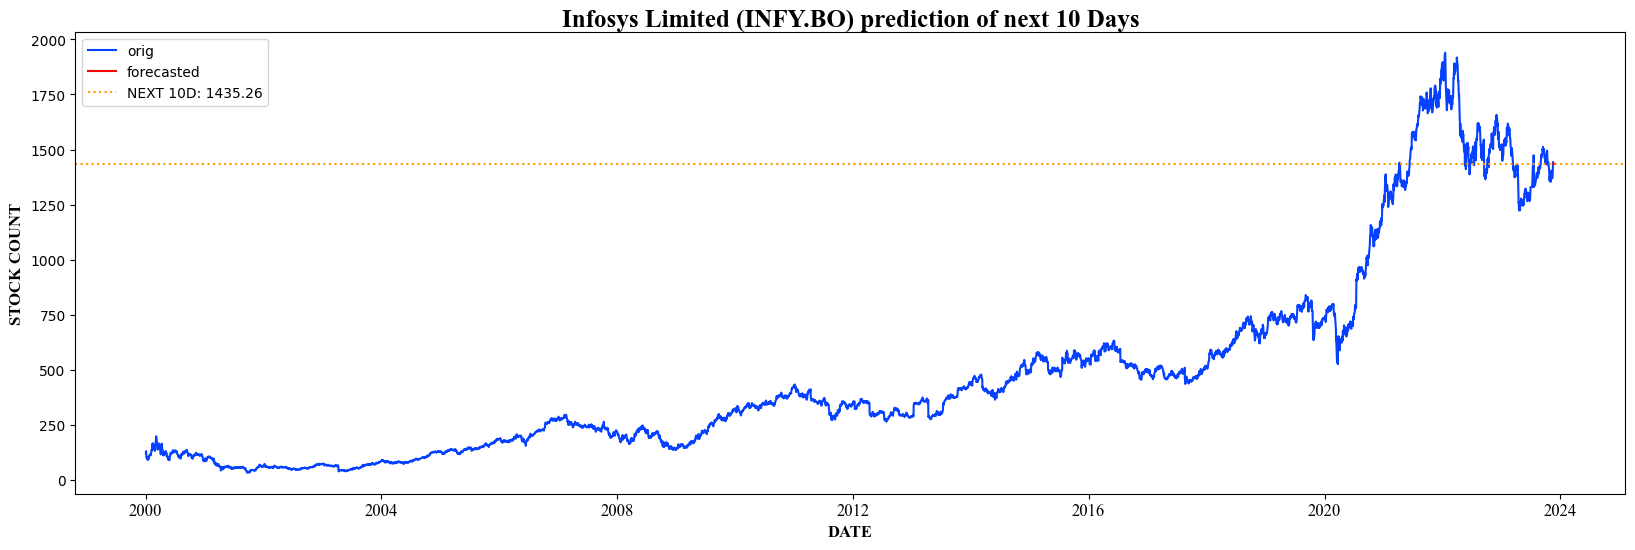

In [64]:
# The yahoo finance ticker for the stock symbol for Infosys
stock_symbol = "Infosys Limited (INFY.BO)"

plt.figure(figsize=(20,6))
sns.lineplot(x='DATE', y='STOCK_PRICE', hue='Indicator', palette=['#0541ff','#FF0000'], data=final_arima_stock_data)
plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
plt.xlabel("DATE", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("STOCK COUNT", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title(f"{stock_symbol} prediction of next {duration} Days", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.axhline(y=final_arima_stock_data.STOCK_PRICE[len(final_arima_stock_data)-1], color = '#ff9900', linestyle = ':', label = f'NEXT {duration}D: {round(float(final_arima_stock_data.STOCK_PRICE[len(final_arima_stock_data)-1]),2)}')
plt.legend()
plt.show()

In [65]:
import pickle
pickle.dump(arima_model, open('arima_model.pkl', 'wb'))

In [66]:
# import pickle
# pickled_arima_model = pickle.load(open('arima_model.pkl', 'rb'))
# # pickled_model.predict(int(len(data_boxcox)*split_percent), int(len(data_boxcox)*split_percent)+len(arima_test_data)-1)
# pickled_arima_model.summary()